In [1]:
import numpy as np
import matplotlib.pyplot as plt

### overleaf

In [2]:
txt = "55.89 ± 0.36 52.82 ± 0.69 54.71 ± 0.33"

x = txt.split(" ")

mean = [x[0], x[3], x[6]]
sd   = [x[2], x[5], x[8]]

mean = [float(x) for x in mean] 
sd   = [float(x) for x in sd] 

print(mean)
print(sd)

[55.89, 52.82, 54.71]
[0.36, 0.69, 0.33]


## Table - cifar10_iid_fedavg_linear_0.8a_pacing-b_gloss
pacing-b: (0.0025, 0.1, 0.2, 0.5, 0.8)

In [3]:
r1_av = [57.88, 45.84, 52.52]
r1_sd = [0.11, 1.93, 0.64]

r2_av = [57.57, 46.5, 53.16]
r2_sd = [0.48, 0.24, 0.33]

r3_av = [57.71, 48.09, 53.53]
r3_sd = [0.21, 0.61, 0.52]

r4_av = [55.78, 50.81, 54.01]
r4_sd = [0.26, 0.76, 0.39]

r5_av = [55.89, 52.82, 54.71]
r5_sd = [0.36, 0.69, 0.33]

In [4]:
table_av = [r1_av, r2_av, r3_av, r4_av, r5_av]
table_sd = [r1_sd, r2_sd, r3_sd, r4_sd, r5_sd]

table_av = np.array(table_av)
table_sd = np.array(table_sd)

## Plots

In [5]:
font = {'family': 'serif',
        'weight': 'normal',
        }
fontsize_axes   = 12 # axes fontsize
fontsize_legend = 11 # legend fontsize
# legend_properties = {'weight':'bold'}

x_label = ["curr", "anti", "rand"]
y_min   = 40
y_max   = 60
y_step  = 5

color_bar1 = 'darkturquoise'
color_bar2 = 'slateblue'
color_bar3 = 'palegreen'
color_bar4 = 'darkgrey'
color_bar5 = 'mediumorchid'

In [6]:
def make_fig_bar(mean, sd, name):
    
    fig, ax = plt.subplots(figsize =(9.5, 7.5), nrows=1, sharex=True)
    
    N = 3
    ind = np.arange(N) 
    width = 0.15

    bar1 = ax.bar(ind, mean[0], yerr=sd[0], width=width, 
                  label="0.0025", color=color_bar1, capsize=3)
    
    bar2 = ax.bar(ind+width, mean[1], yerr=sd[1], width=width, 
                  label="0.1", color=color_bar2, capsize=3)
    
    bar3 = ax.bar(ind+width*2, mean[2], yerr=sd[2], width=width, 
                   label="0.2", color=color_bar3, capsize=3)
    
    bar4 = ax.bar(ind+width*3, mean[3], yerr=sd[3], width=width, 
                   label="0.5", color=color_bar4, capsize=3)
    
    bar5 = ax.bar(ind+width*4, mean[4], yerr=sd[4], width=width, 
                   label="0.8", color=color_bar5, capsize=3)
    

    plt.xticks(ind+width*2, x_label)
    ax.set_xticklabels(x_label, fontdict=font, fontsize=fontsize_axes, rotation=0)
    plt.ylim(y_min, y_max)
    ax.set_yticks(np.arange(y_min, y_max, y_step))
    yticks = [str(el) for el in np.arange(y_min, y_max, y_step)]
    ax.set_yticklabels(yticks, fontsize=fontsize_axes, fontdict=font, color='black')
    
    ax.set_xlabel('Ordering', fontsize=15, labelpad=2, fontdict=font)
    ax.set_ylabel('Accuracy', fontsize=15, labelpad=4, fontdict=font)
    
    ax.grid(visible=True, which='major', axis='y')
    plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", 
               mode="expand", borderaxespad=0, ncol=3, 
               fontsize=fontsize_legend)
    ax.margins(x=0.1)
    figure = plt.gcf()
    figure.set_size_inches(3.5, 2.5)
    plt.subplots_adjust(hspace = 0.01)
    fig.savefig('../figures/' + name + '_bar.eps', format='eps', dpi=1000, bbox_inches='tight')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


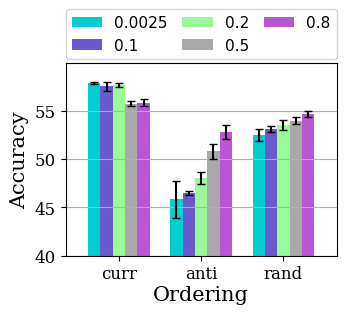

In [7]:
make_fig_bar(table_av, table_sd, 
             'cifar10_iid_fedavg_linear_0.8a_pacing-b_gloss')